# Study of Indices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from functions.loading_and_processing_data import loadMITgcmData, read_all_data, smoothDataset, createMapIndex
from functions.correlation_maps import simpleCorrelationMap

In this notebook, different indices are studied in order to understand the relationship between the wind and the undercurrent and on shelf heat advection.
Indices that are compared are:
- PITE box zonal winds
- PITE box zonal wind stress
- Wind stress curl (in small box)
- Wind curl shelf break gradient.

# Correlation Maps
Indicate which region we use for determining the index.

Start preparing for correlation map!
Loading number:19
../02_data/maps/EXFuwind_ens20.nc
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


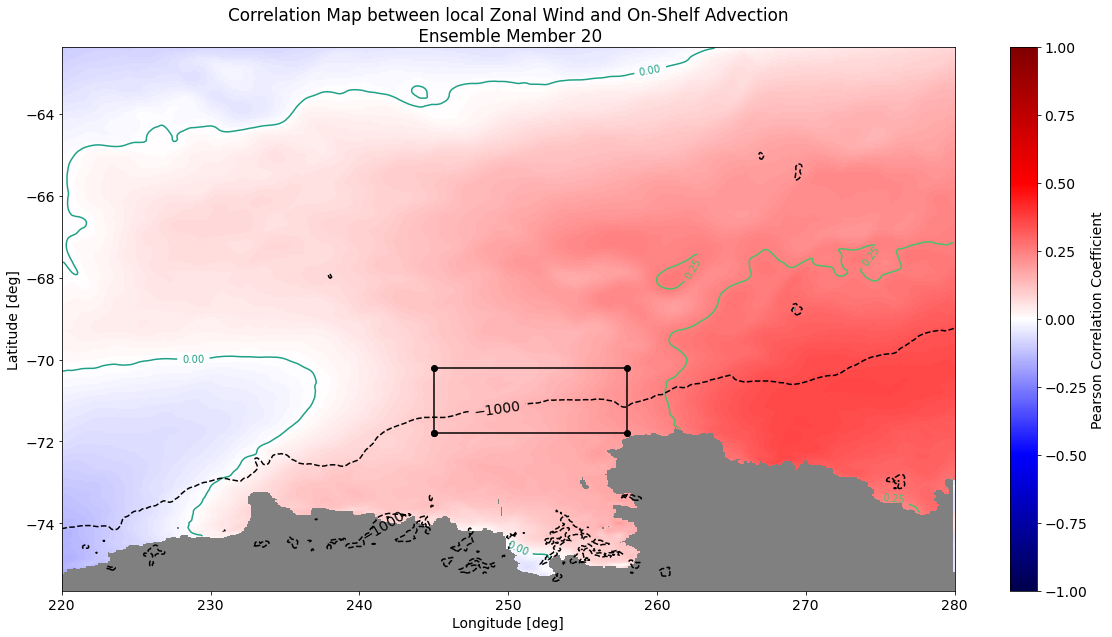

In [74]:
members=[19,20]

simpleCorrelationMap(members=members,
                     data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Zonal Wind and On-Shelf Advection', ymax=None, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                     inverse=True, y_gradient=False,
                     give_back=False)

Start preparing for correlation map!
Loading number:19
../02_data/maps/oceTAUX_ens20.nc
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


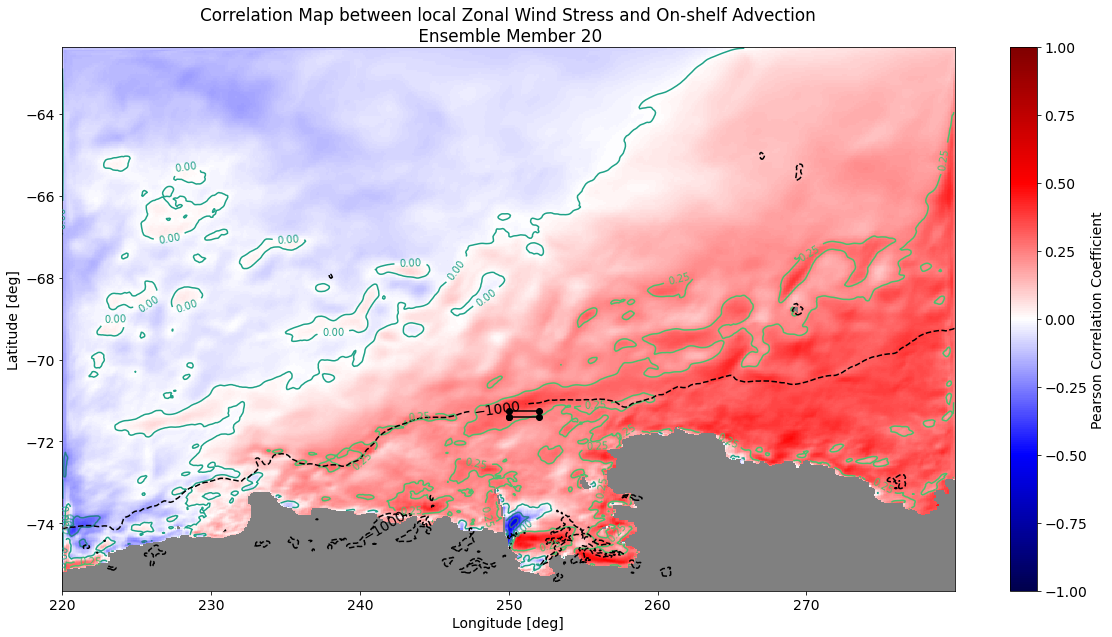

In [75]:
simpleCorrelationMap(members=members,
                     data=None, datafn='oceTAUX', datavar='oceTAUX', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Zonal Wind Stress and On-shelf Advection', ymax=None, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.4, -71.25],
                     inverse=True,
                     give_back=False)

In [5]:
members=[19,20]
data=xr.open_dataset('../02_data/maps/curlTAU_ens20.nc')
data=smoothDataset(data, var='curlTAU', which_area='rAz')

simpleCorrelationMap(members=members,
                     data=data, datafn='curlTAU', datavar='curlTAU', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local smoothed Wind Stress Curl and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.4, -71.25],
                     inverse=True,
                     give_back=False)

Start preparing for correlation map!
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data


KeyError: 'curlTAU'

Start preparing for correlation map!
Loading number:19
../02_data/maps/curlWIND_ens20.nc
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


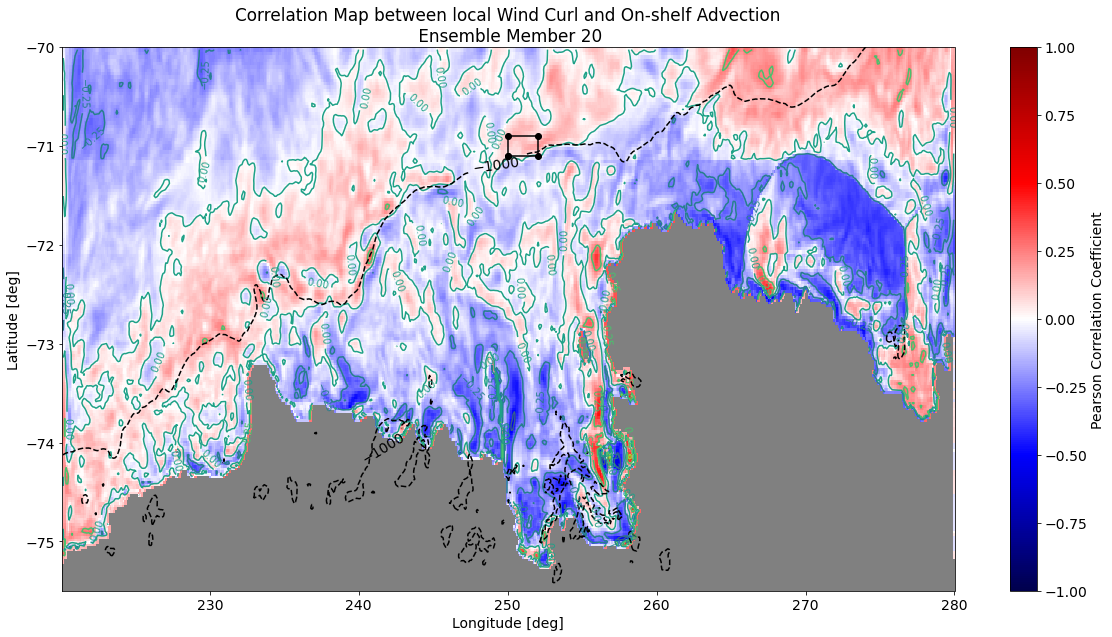

In [77]:
simpleCorrelationMap(members=members,
                     data=None, datafn='curlWIND', datavar='curlWIND', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Wind Curl and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.1, -70.9],
                     inverse=True,
                     give_back=False)

Start preparing for correlation map!
Loading number:19
../02_data/maps/curlWIND_ens20.nc
...NOTE: Taking YGRADIENT!
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


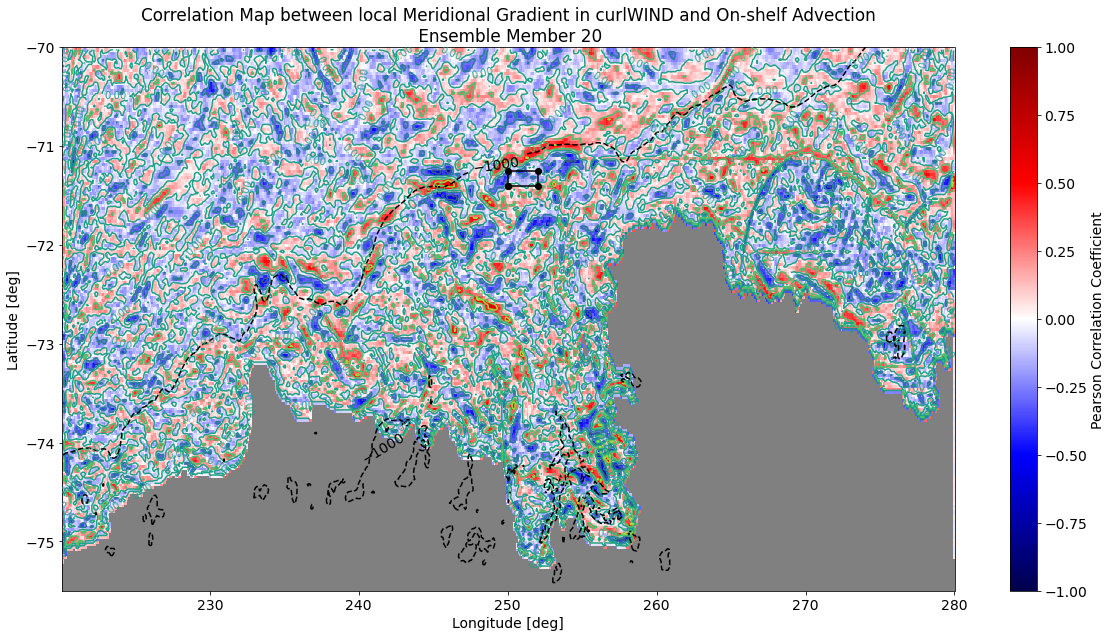

In [78]:
simpleCorrelationMap(members=members,
                     data=None, datafn='curlWIND', datavar='curlWIND', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Meridional Gradient in curlWIND and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.4, -71.25],
                     inverse=True, ygradient=True,
                     give_back=False)

Start preparing for correlation map!
Loading number:19
../02_data/maps/curlTAU_ens20.nc
...NOTE: Taking YGRADIENT!
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


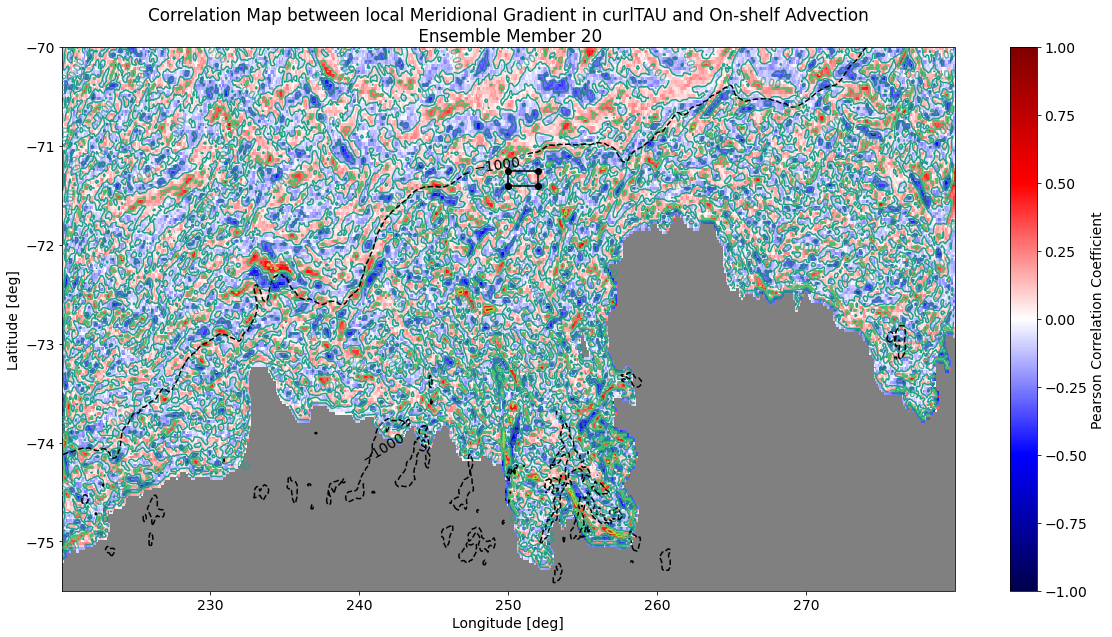

In [79]:
simpleCorrelationMap(members=members,
                     data=None, datafn='curlTAU', datavar='curlTAU', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Meridional Gradient in curlTAU and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.4, -71.25],
                     inverse=True, ygradient=True,
                     give_back=False)

Start preparing for correlation map!
...Reading: ADVy_TH_PITE
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


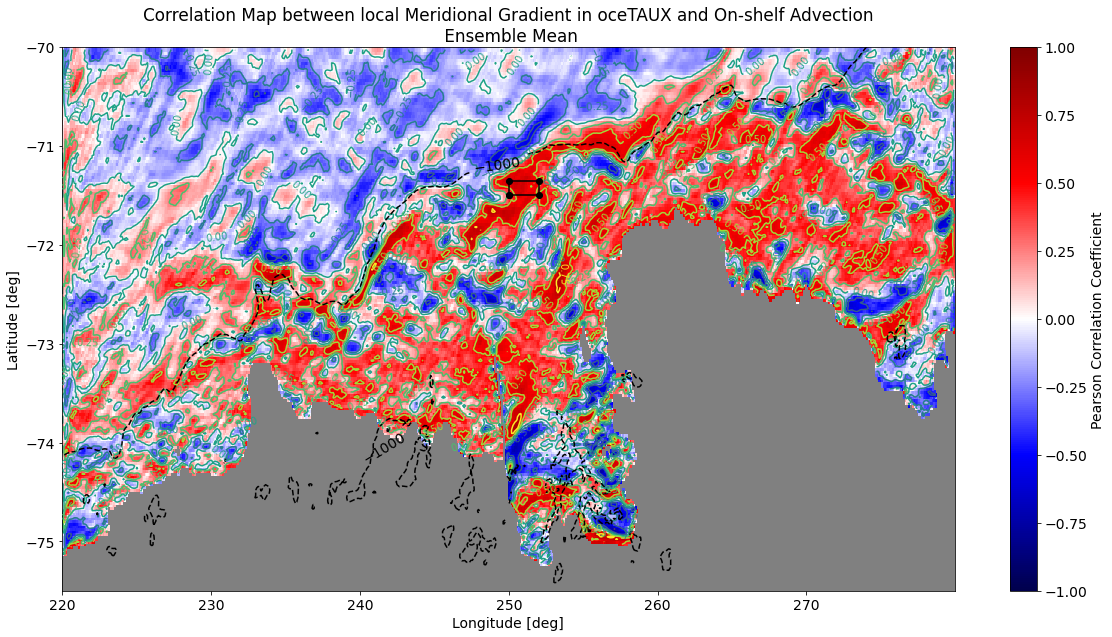

In [153]:
data=xr.open_dataset('/data/hpcdata/users/grejan/mitgcm/02_data/maps/oceTAUX_ensmean.nc').expand_dims('ens')
data=data.where(data!=0, drop=True)
data=data.diff('YC')
datay=data.rolling(YC=21, center=True, min_periods=10).mean()
dataxy=datay.rolling(XG=21, center=True, min_periods=10).mean()

members='all'

simpleCorrelationMap(members=members,
                     data=data, datafn='oceTAUX', datavar='oceTAUX', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Meridional Gradient in oceTAUX and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[250, 252],box_y=[-71.5, -71.35],
                     inverse=True, ygradient=False,
                     give_back=False)

Start preparing for correlation map!
Loading number:19
../02_data/maps/EXFuwind_ens20.nc
...NOTE: Taking YGRADIENT!
...Reading: ADVy_TH_PITE
...Selecting member 20
...Detrending data
...Applying rolling mean
...Computing correlation coefficients
...Plotting
...NOTE: Taking the INVERSE of the correlation!


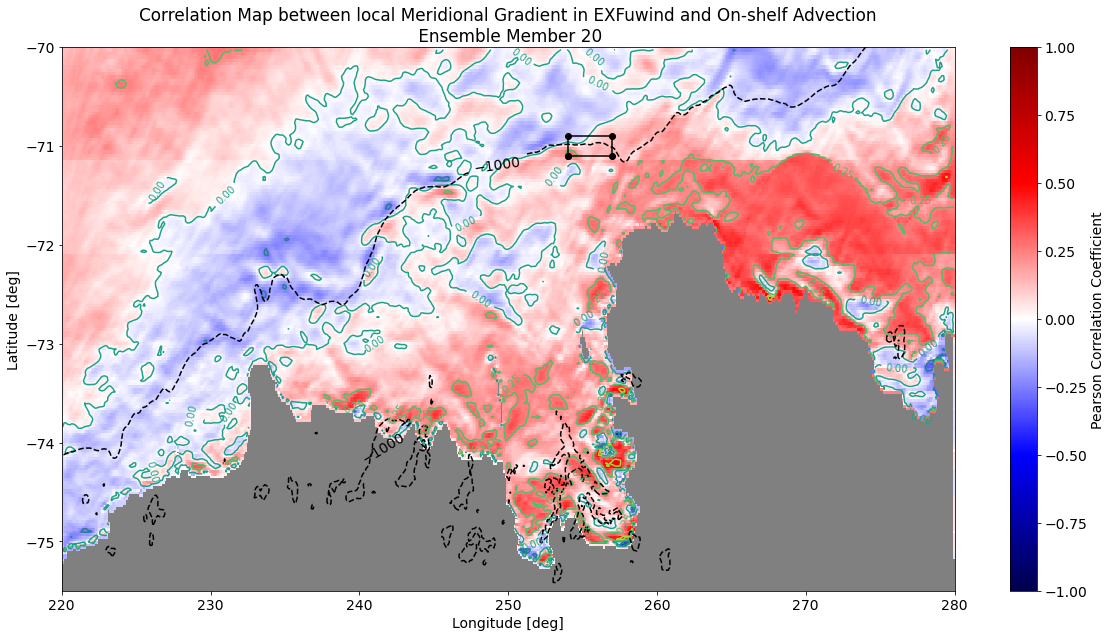

In [81]:
simpleCorrelationMap(members=members,
                     data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
                     ind=None, indfn='ADVy_TH_PITE', indvar='ADVy_TH',
                     detrend=True, window=24, title='Correlation Map between local Meridional Gradient in EXFuwind and On-shelf Advection', ymax=-70, save=False, savefn='test', cumulative=False,
                     draw_box=True, box_x=[254, 257],box_y=[-71.1, -70.9],
                     inverse=True, ygradient=True,
                     give_back=False)

## Computing the Actual Indices

First, we want to plot the ensemble mean indices, in order to get a first glance at their ability to predict the PITE heat flux.

...Starting with EXFuwind


/tmp/ipykernel_36315/3780655270.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/3780655270.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


0.6286264739425795
0.6046702207377841
0.6324035127154117
0.6004182418476067
0.7433768104128716
0.7908086962360096
0.48527458023369735
0.8183653407154072
...Starting with oceTAUX


/tmp/ipykernel_36315/3780655270.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/3780655270.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


0.6417309163796852
0.6048903061921562
0.6963622218861901
0.6227149462172342
0.707987594594522
0.8450607605499152
-0.21651739756514063
0.9011438525515622
...Starting with curlWIND


/tmp/ipykernel_36315/3780655270.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/3780655270.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


-0.610919075007749
-0.5770261182056854
-0.2731551623944994
-0.7721379582325092
0.39063821220866385
-0.45685314915457537
0.7157141127628017
-0.0838566052900698
...Starting with curlTAU


/tmp/ipykernel_36315/3780655270.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/3780655270.py:17: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


-0.5235740854163905
-0.8415675234004981
0.5037676500253511
-0.8998916307627998
0.8119931188252129
-0.18700307281057024
0.7330849824419062
-0.583915263878039


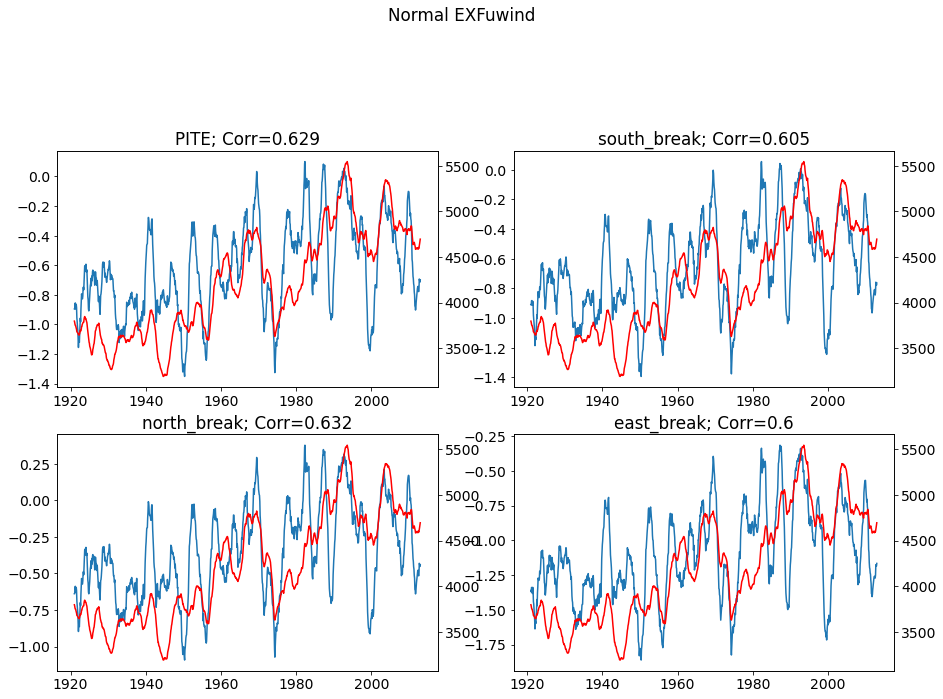

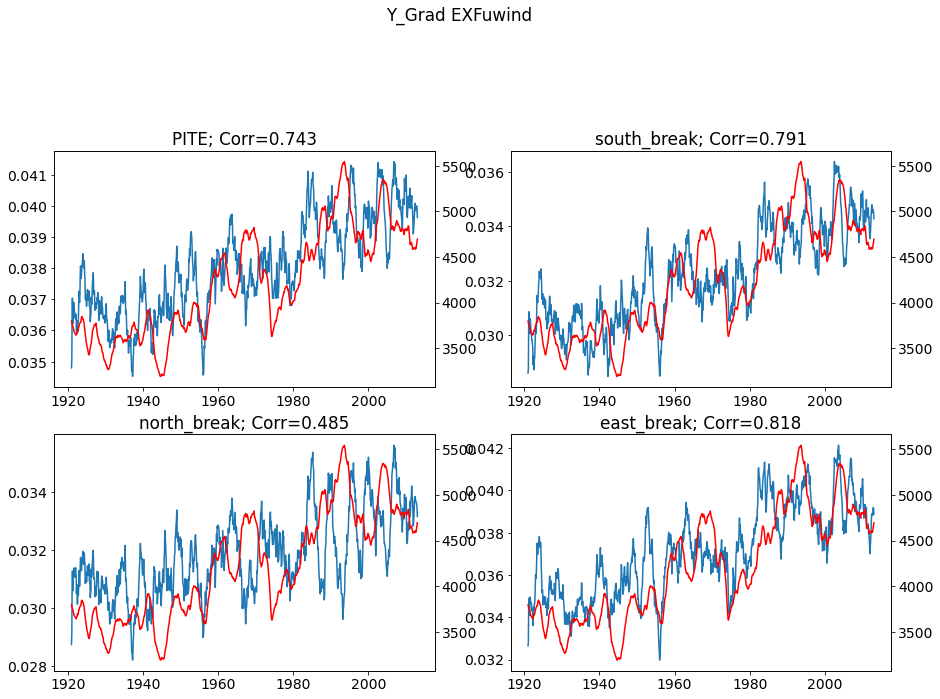

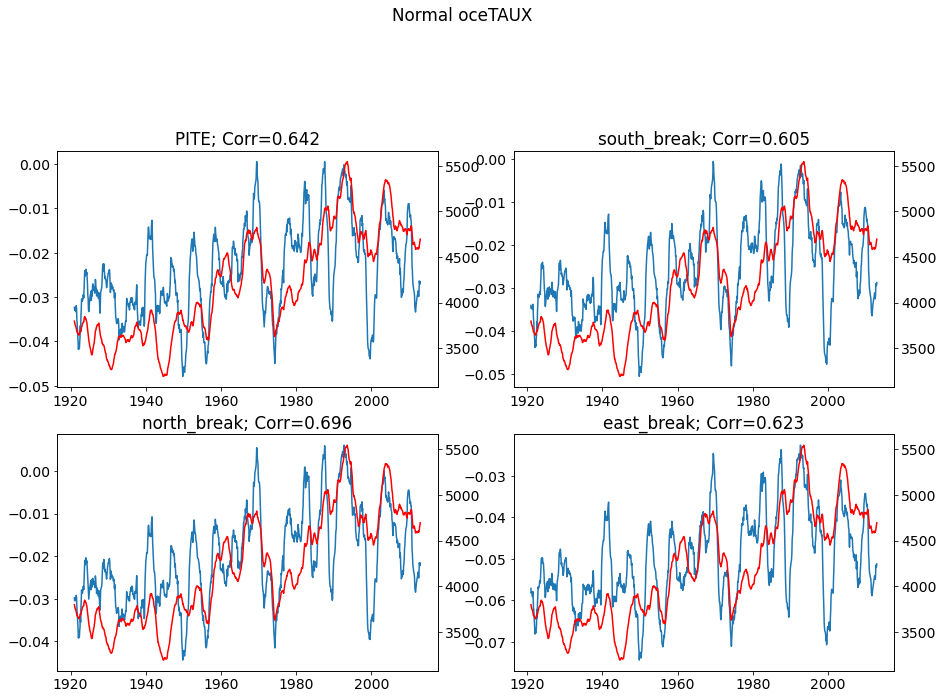

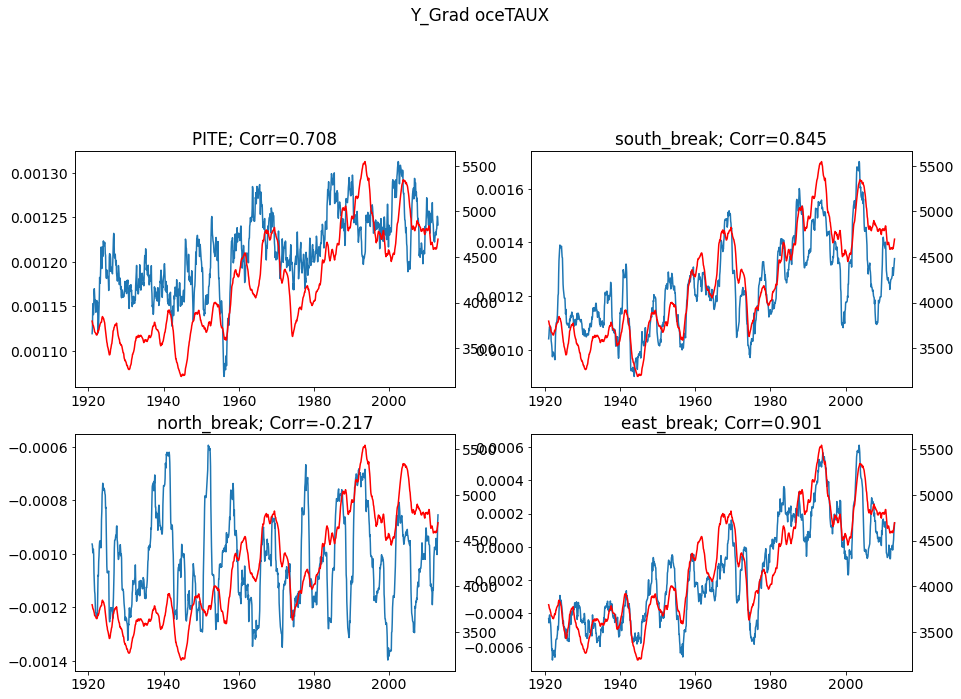

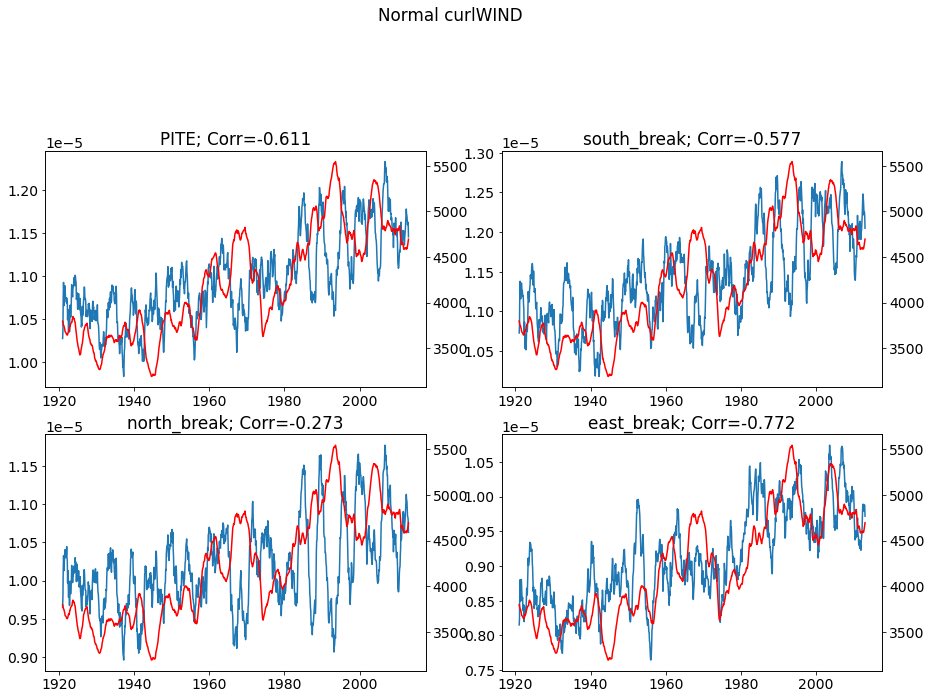

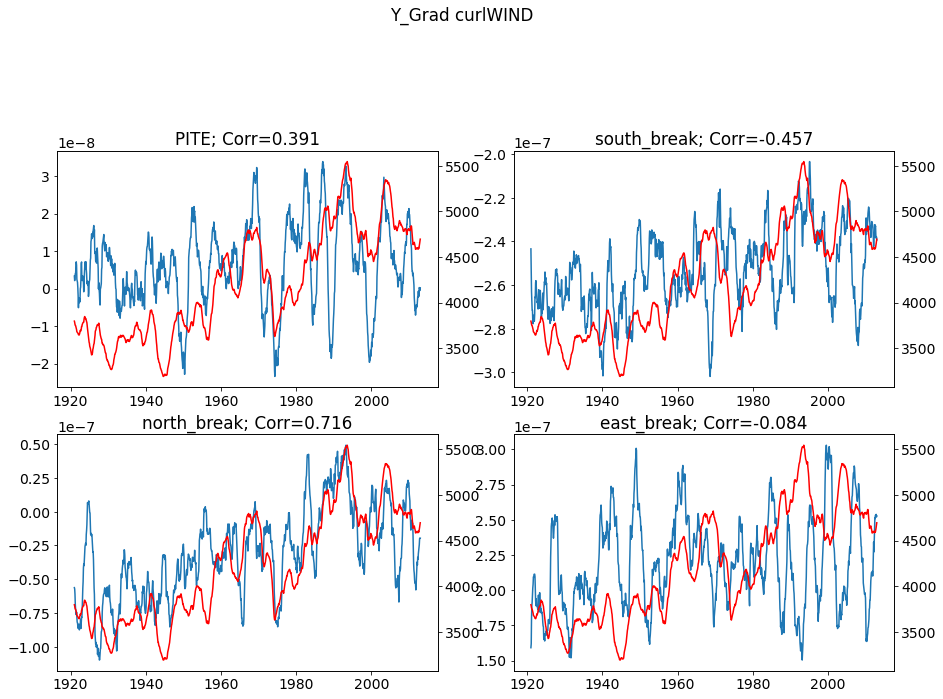

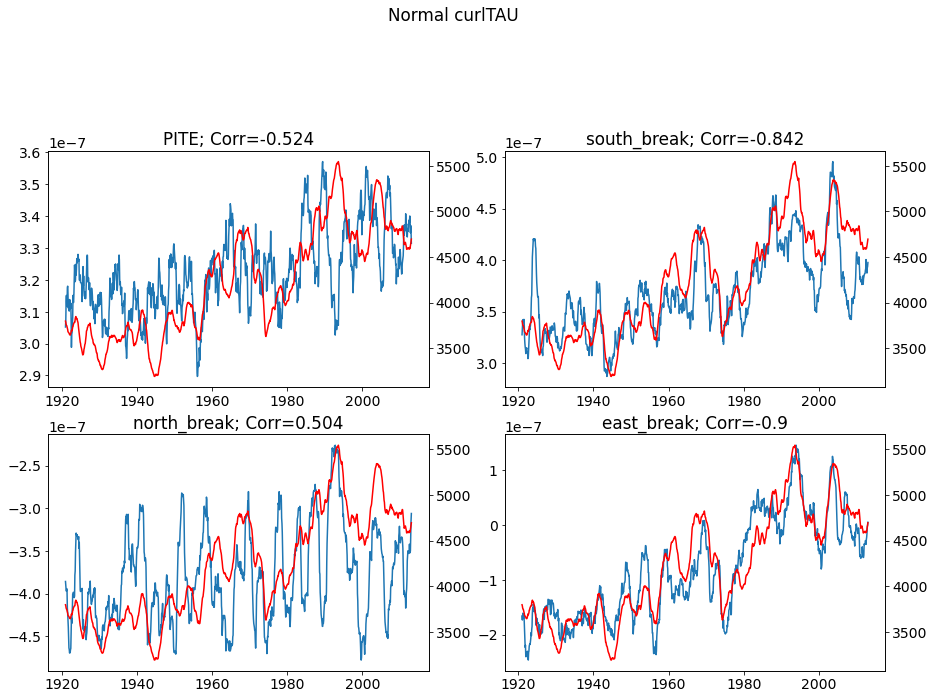

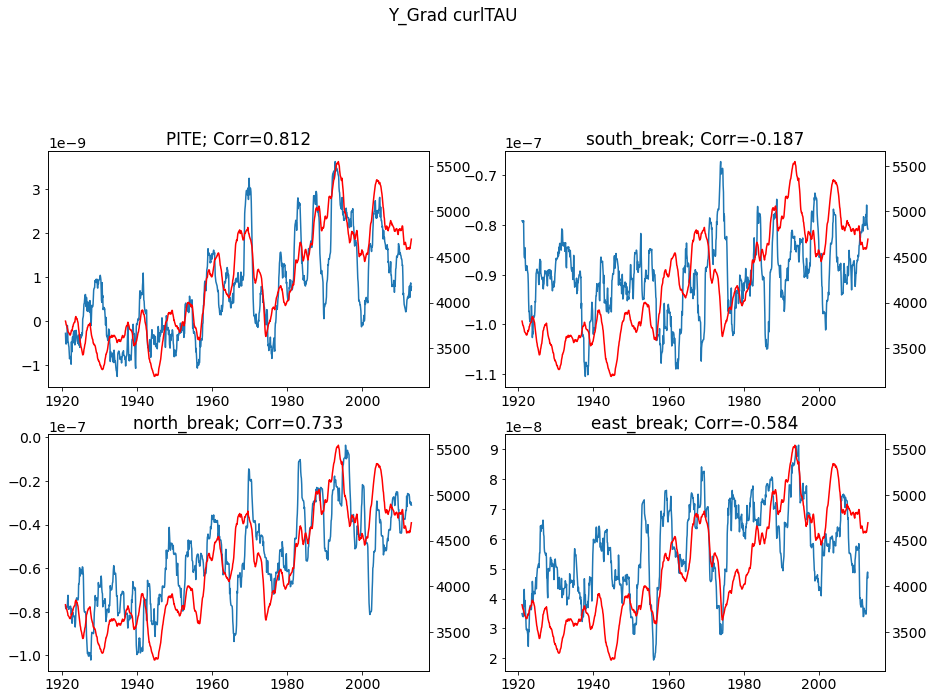

In [47]:
fn_list=['EXFuwind', 'oceTAUX', 'curlWIND', 'curlTAU']
loc_list=['PITE', 'south_break', 'north_break', 'east_break']
locs={'PITE': [360-115, 360-102, -71.8, -70.2], 'south_break':[250, 252, -71.4, -71.25], 'north_break':[250, 252,-71.1, -70.9],'east_break':[254, 257, -71.1, -70.9]}

y_grad=True

indfn='ADVy_TH_PITE'
#indfn='undercurrent_W115'

for fn in fn_list:
    print('...Starting with '+fn)
    data=xr.open_dataset('../02_data/maps/'+fn+'_ensmean.nc')
    ind=xr.open_dataarray('/data/hpcdata/users/grejan/mitgcm/02_data/indices/'+indfn+'.nc')
    
    indmean=ind.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
    indmean['time']=indmean.indexes['time'].to_datetimeindex()
    data['time']=data.indexes['time'].to_datetimeindex()
    
    if y_grad==True:
        add_to_title=['Normal', 'Y_Grad']
    else:
        add_to_title=['Normal']
    
    for name in add_to_title:
        if name=='Y_Grad':
            if 'YC' in data.dims:
                data=data.diff('YC')
            else:
                data=data.diff('YG')
        
        plt.figure(figsize=(15, 20))
        plt.suptitle(name+' '+fn)
        for i, loc in enumerate(loc_list):
            plt.subplot(4,2,i+1)
            
            if 'YC' in data.dims:
                if 'XC' in data.dims:
                    datindex=(data[fn].sel(time=slice('1920', '2013'))
                                     .sel(XC=slice(locs[loc][0], locs[loc][1]), YC=slice(locs[loc][2], locs[loc][3])).mean(dim=['XC', 'YC'])
                                     .rolling(time=24, center=True).mean())
                else:
                    datindex=(data[fn].sel(time=slice('1920', '2013'))
                                     .sel(XG=slice(locs[loc][0], locs[loc][1]), YC=slice(locs[loc][2], locs[loc][3])).mean(dim=['XG', 'YC'])
                                     .rolling(time=24, center=True).mean())
            else:
                datindex=(data[fn].sel(time=slice('1920', '2013'))
                                 .sel(XG=slice(locs[loc][0], locs[loc][1]), YG=slice(locs[loc][2], locs[loc][3])).mean(dim=['XG', 'YG'])
                                 .rolling(time=24, center=True).mean())
            
            cor=xr.corr(datindex, -1*indmean, dim='time').to_numpy()
            print(cor)
            if cor<0:
                plt.plot(data.sel(time=slice('1920', '2013')).time, -1*datindex)
            else:
                plt.plot(data.sel(time=slice('1920', '2013')).time, datindex)
            plt.twinx()
            plt.plot(indmean.sel(time=slice('1920', '2013')).time, 
                     -1*indmean, c='r')
            
            
            
            plt.title(loc+'; Corr='+str(round(float(cor),3)))
    
    
    
    
    
    
    
    



Next up, we want to look at the best indices () and check their correlation within individual ensemble members.

...Starting with oceTAUX
Loading number:0
../02_data/maps/oceTAUX_ens1.nc
Loading number:1
../02_data/maps/oceTAUX_ens2.nc
Loading number:2
../02_data/maps/oceTAUX_ens3.nc
Loading number:3
../02_data/maps/oceTAUX_ens4.nc
Loading number:4
../02_data/maps/oceTAUX_ens5.nc
Loading number:5
../02_data/maps/oceTAUX_ens6.nc
Loading number:6
../02_data/maps/oceTAUX_ens7.nc
Loading number:7
../02_data/maps/oceTAUX_ens8.nc
Loading number:8
../02_data/maps/oceTAUX_ens9.nc
Loading number:9
../02_data/maps/oceTAUX_ens10.nc
Loading number:10
../02_data/maps/oceTAUX_ens11.nc
Loading number:11
../02_data/maps/oceTAUX_ens12.nc
Loading number:12
../02_data/maps/oceTAUX_ens13.nc
Loading number:13
../02_data/maps/oceTAUX_ens14.nc
Loading number:14
../02_data/maps/oceTAUX_ens15.nc
Loading number:15
../02_data/maps/oceTAUX_ens16.nc
Loading number:16
../02_data/maps/oceTAUX_ens17.nc
Loading number:17
../02_data/maps/oceTAUX_ens18.nc
Loading number:18
../02_data/maps/oceTAUX_ens19.nc
Loading number:19
../02_d

/tmp/ipykernel_36315/1452526294.py:19: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/1452526294.py:20: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


...Starting with curlTAU
Loading number:0
../02_data/maps/curlTAU_ens1.nc
Loading number:1
../02_data/maps/curlTAU_ens2.nc
Loading number:2
../02_data/maps/curlTAU_ens3.nc
Loading number:3
../02_data/maps/curlTAU_ens4.nc
Loading number:4
../02_data/maps/curlTAU_ens5.nc
Loading number:5
../02_data/maps/curlTAU_ens6.nc
Loading number:6
../02_data/maps/curlTAU_ens7.nc
Loading number:7
../02_data/maps/curlTAU_ens8.nc
Loading number:8
../02_data/maps/curlTAU_ens9.nc
Loading number:9
../02_data/maps/curlTAU_ens10.nc
Loading number:10
../02_data/maps/curlTAU_ens11.nc
Loading number:11
../02_data/maps/curlTAU_ens12.nc
Loading number:12
../02_data/maps/curlTAU_ens13.nc
Loading number:13
../02_data/maps/curlTAU_ens14.nc
Loading number:14
../02_data/maps/curlTAU_ens15.nc
Loading number:15
../02_data/maps/curlTAU_ens16.nc
Loading number:16
../02_data/maps/curlTAU_ens17.nc
Loading number:17
../02_data/maps/curlTAU_ens18.nc
Loading number:18
../02_data/maps/curlTAU_ens19.nc
Loading number:19
../02_d

/tmp/ipykernel_36315/1452526294.py:19: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  indmean['time']=indmean.indexes['time'].to_datetimeindex()
/tmp/ipykernel_36315/1452526294.py:20: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time']=data.indexes['time'].to_datetimeindex()


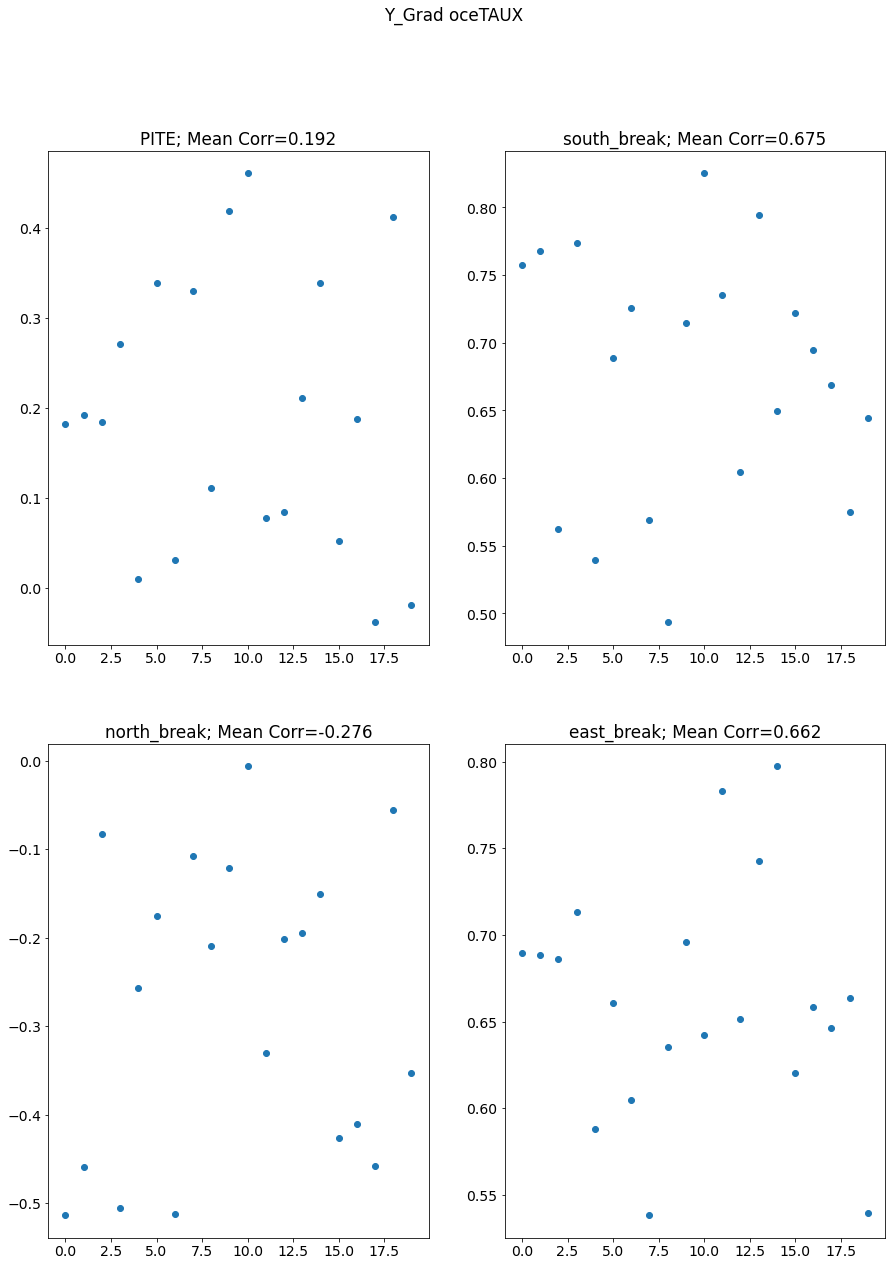

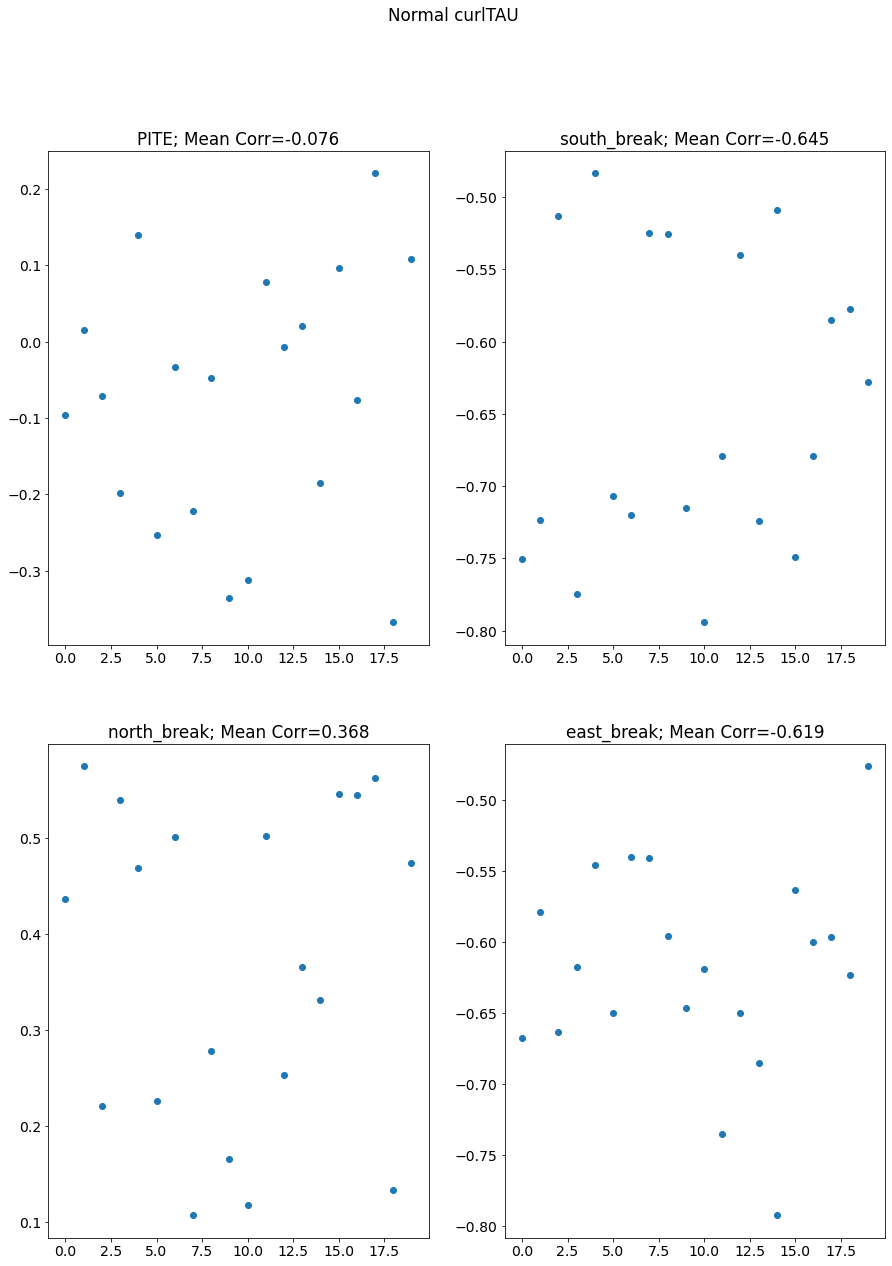

In [50]:
# fn_list=['EXFuwind', 'oceTAUX', 'curlWIND', 'curlTAU']
loc_list=['PITE', 'south_break', 'north_break', 'east_break']


locs={'PITE': [360-115, 360-102, -71.8, -70.2], 'south_break':[250, 252, -71.4, -71.25], 'north_break':[250, 252,-71.1, -70.9],'east_break':[254, 257, -71.1, -70.9]}

fn_list=['oceTAUX', 'curlTAU']
name_list=['Y_Grad', 'Normal']

indfn='ADVy_TH_PITE'
#indfn='undercurrent_W115'

for j, fn in enumerate(fn_list):
    print('...Starting with '+fn)
    data=loadMITgcmData(fn, members='all', kind='maps')
    ind=xr.open_dataarray('/data/hpcdata/users/grejan/mitgcm/02_data/indices/'+indfn+'.nc')
    
    indmean=ind.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
    indmean['time']=indmean.indexes['time'].to_datetimeindex()
    data['time']=data.indexes['time'].to_datetimeindex()
    
    name=name_list[j]
    if name=='Y_Grad':
        if 'YC' in data.dims:
            data=data.diff('YC')
        else:
            data=data.diff('YG')

    plt.figure(figsize=(15, 20))
    plt.suptitle(name+' '+fn)
    for i, loc in enumerate(loc_list):
        plt.subplot(2,2,i+1)

        if 'YC' in data.dims:
            if 'XC' in data.dims:
                datindex=(data[fn].sel(time=slice('1920', '2013'))
                                 .sel(XC=slice(locs[loc][0], locs[loc][1]), YC=slice(locs[loc][2], locs[loc][3])).mean(dim=['XC', 'YC'])
                                 .rolling(time=24, center=True).mean())
            else:
                datindex=(data[fn].sel(time=slice('1920', '2013'))
                                 .sel(XG=slice(locs[loc][0], locs[loc][1]), YC=slice(locs[loc][2], locs[loc][3])).mean(dim=['XG', 'YC'])
                                 .rolling(time=24, center=True).mean())
        else:
            datindex=(data[fn].sel(time=slice('1920', '2013'))
                             .sel(XG=slice(locs[loc][0], locs[loc][1]), YG=slice(locs[loc][2], locs[loc][3])).mean(dim=['XG', 'YG'])
                             .rolling(time=24, center=True).mean())
        cor=[]
        for ens in range(20):
            cor+=[float(xr.corr(datindex.sel(ens=ens), -1*indmean.sel(ens=ens), dim='time').to_numpy())]

        plt.scatter(np.arange(20), cor)
        plt.title(loc+'; Mean Corr='+str(round(float(np.mean(cor)),3)))
    

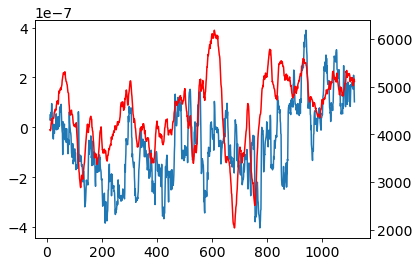

In [91]:
ens=19
plt.plot(-1*datindex.sel(ens=ens))
plt.twinx()
plt.plot(-1*indmean.sel(ens=ens), c='r')

In [68]:
xr.corr(datindex.sel(ens=ens), -1*indmean.sel(ens=ens), dim='time')

<xarray.DataArray ()>
array(-0.66345085)
Coordinates:
    YG       float32 -73.01

## Correlation Coefficients: which one has the best correlation coefficient?